Setting up iPython

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

Generate and plot a Brownian motion.

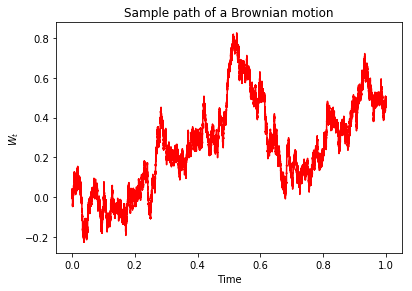

In [2]:
%matplotlib inline

#Normal Increments
noiseT = lambda N,T: np.random.normal(0,sqrt(T/float(N)),N)

# Number of time steps:
N = 1000000
t = np.linspace(0,1,N+1) # time discretisation
# append a 0 to the start of the noise vector, and compute the cumulative sum:
W = cumsum(np.hstack((arange(1),noiseT(N,1))))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t, W, 'r')

axes.set_xlabel(r'Time')
axes.set_ylabel(r'$W_t$')
axes.set_title(r'Sample path of a Brownian motion');


Now let's compute the sum of squared increments: $$V_t^M:= \sum_{k=1}^{\lfloor Mt \rfloor} (W_{k/M}-W_{(k-1)/M})^2$$

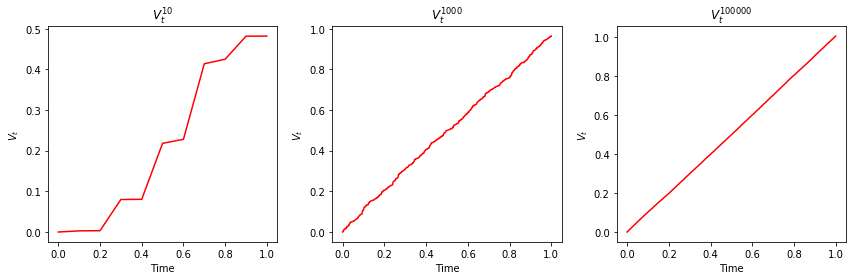

In [3]:
# Write a function to plot the resulting sum of 
#   squared increments for different values of M
def V_plot(NN,X):
    "This plots V_t^M[X] for all values of M in NN"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        M = NN[index] # 1/Size of steps
        K = (N/M).astype(int) # Total number of steps
        t = np.linspace(0,1,M+1) # time discretisation
        # Compute squared differences
        Q = np.square(np.diff(X[0:(N+1):K]))
        # append a 0 to the start of the squared difference 
        #   vector, and compute the cumulative sum:
        V = cumsum(np.hstack((arange(1),Q)))
        
        ax.plot(t, V, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$V_t$')
        ax.set_title(r'$V_t^{{ {0} }}$'.format(M))
    
        fig.tight_layout()

NN = np.array([10,1000,100000])
V_plot(NN,W)

What we see is that the cumulative sum: $V_t^M \to t$ as $M \to \infty$.

In a similar manner, we can compute: $$H^M_t:= \sum_{k=1}^{\lfloor Mt \rfloor} |W_{k/M}-W_{(k-1)/M}|$$

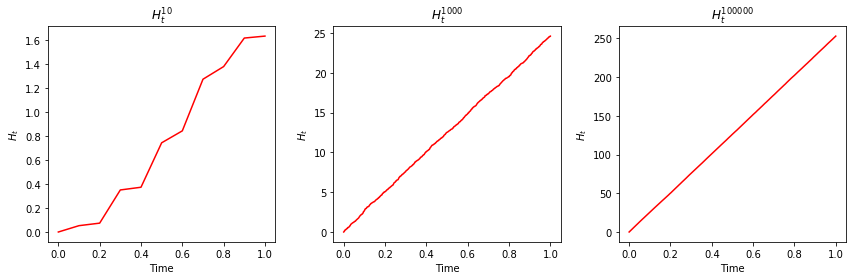

In [4]:
# Write a function to plot the resulting sum of squared 
#    increments for different values of M
def H_plot(NN,X):
    "This plots H_t^M[X] for all values of M in NN"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        M = NN[index] # 1/Size of steps
        K = (N/M).astype(int) # Total number of steps
        t = np.linspace(0,1,M+1) # time discretisation
        # Compute squared differences
        Q = np.absolute(np.diff(X[0:(N+1):K]))
        # append a 0 to the start of the squared difference vector, 
        #    and compute the cumulative sum:
        H = cumsum(np.hstack((arange(1),Q)))
        
        ax.plot(t, H, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$H_t$')
        ax.set_title(r'$H_t^{{ {0} }}$'.format(M))
    
        fig.tight_layout()

NN = np.array([10,1000,100000])
H_plot(NN,W)

We see from the scale on the $y$-axis that the process is growing in $N$.